In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key



In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3f747f6af5f7178088300fcdbf789c0


In [8]:
# Create an empty list to hold the weather data.

print("-----------------------------")city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palmer
Processing Record 2 of Set 1 | san ignacio
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | glens falls
Processing Record 6 of Set 1 | sobolevo
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | gat
Processing Record 10 of Set 1 | abha
Processing Record 11 of Set 1 | hambantota
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 1 | thayetmyo
Processing Record 20 of Set 1 | nichinan
Processing Record 21 of Set 1 | melita
Processing Record 22 of Set 1 | mahebourg
Processi

Processing Record 38 of Set 4 | maracacume
Processing Record 39 of Set 4 | biltine
Processing Record 40 of Set 4 | hofn
Processing Record 41 of Set 4 | san rafael
Processing Record 42 of Set 4 | wahran
City not found. Skipping...
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | linqiong
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | morondava
Processing Record 47 of Set 4 | yumen
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | nyaunglebin
Processing Record 50 of Set 4 | sayyan
Processing Record 1 of Set 5 | clyde river
Processing Record 2 of Set 5 | itarema
Processing Record 3 of Set 5 | verkhnyaya inta
Processing Record 4 of Set 5 | esmeralda
Processing Record 5 of Set 5 | rio gallegos
Processing Record 6 of Set 5 | sorong
Processing Record 7 of Set 5 | berlevag
Processing Record 8 of Set 5 | bucerias
Processing Record 9 of Set 5 | antofagasta
Processing Record 10 of Set 5 | cumberland
Processing Record 11 of Set 

Processing Record 27 of Set 8 | helena
Processing Record 28 of Set 8 | oyem
Processing Record 29 of Set 8 | hasaki
Processing Record 30 of Set 8 | pacifica
Processing Record 31 of Set 8 | saint-pierre
Processing Record 32 of Set 8 | aitape
Processing Record 33 of Set 8 | zhezkazgan
Processing Record 34 of Set 8 | saint-augustin
Processing Record 35 of Set 8 | narsaq
Processing Record 36 of Set 8 | krasnoselkup
Processing Record 37 of Set 8 | chokurdakh
Processing Record 38 of Set 8 | poltavka
Processing Record 39 of Set 8 | trinidad
Processing Record 40 of Set 8 | carauari
Processing Record 41 of Set 8 | ayer itam
City not found. Skipping...
Processing Record 42 of Set 8 | natchez
Processing Record 43 of Set 8 | stekolnyy
City not found. Skipping...
Processing Record 44 of Set 8 | mehamn
Processing Record 45 of Set 8 | safaga
Processing Record 46 of Set 8 | conakry
Processing Record 47 of Set 8 | belaya gora
Processing Record 48 of Set 8 | nouadhibou
Processing Record 49 of Set 8 | lip

Processing Record 18 of Set 12 | oneonta
Processing Record 19 of Set 12 | ilhabela
Processing Record 20 of Set 12 | tromso
Processing Record 21 of Set 12 | am timan
Processing Record 22 of Set 12 | gangotri
City not found. Skipping...
Processing Record 23 of Set 12 | poli
Processing Record 24 of Set 12 | puerto escondido
Processing Record 25 of Set 12 | tateyama
Processing Record 26 of Set 12 | port blair
Processing Record 27 of Set 12 | port-gentil
Processing Record 28 of Set 12 | shingu
Processing Record 29 of Set 12 | tomatlan
Processing Record 30 of Set 12 | manoel urbano
Processing Record 31 of Set 12 | north platte
Processing Record 32 of Set 12 | pangai
Processing Record 33 of Set 12 | namatanai
Processing Record 34 of Set 12 | kuusamo
Processing Record 35 of Set 12 | tshane
Processing Record 36 of Set 12 | juneau
Processing Record 37 of Set 12 | sampit
Processing Record 38 of Set 12 | ekibastuz
Processing Record 39 of Set 12 | martapura
Processing Record 40 of Set 12 | yar-sale

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Palmer,42.1584,-72.3287,44.62,51,75,1.01,US,2021-12-05 16:23:01
1,San Ignacio,17.1561,-89.0714,77.14,78,40,0.00,BZ,2021-12-05 16:32:33
2,Longyearbyen,78.2186,15.6401,-2.16,94,45,3.71,SJ,2021-12-05 16:32:33
3,Butaritari,3.0707,172.7902,82.11,80,78,15.52,KI,2021-12-05 16:32:33
4,Glens Falls,43.3095,-73.6440,40.32,73,1,1.01,US,2021-12-05 16:32:34
5,Sobolevo,54.4299,31.8996,20.95,98,29,4.68,RU,2021-12-05 16:32:34
6,Arraial Do Cabo,-22.9661,-42.0278,85.96,74,20,16.11,BR,2021-12-05 16:29:17
7,Albany,42.6001,-73.9662,40.46,58,100,1.99,US,2021-12-05 16:28:42
8,Gat,31.6100,34.7642,61.79,36,7,6.44,IL,2021-12-05 16:32:34
9,Abha,18.2164,42.5053,60.62,72,0,5.75,SA,2021-12-05 16:32:35


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

new_column_order = ["column2", "column4", "column1"]
df = df[new_column_order]

NameError: name 'df' is not defined

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

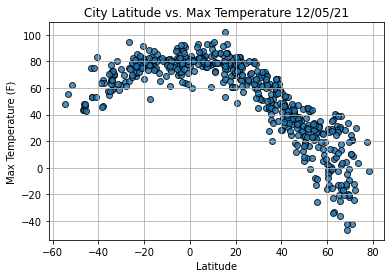

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

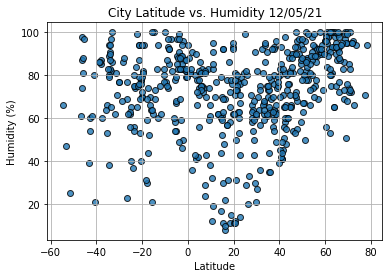

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

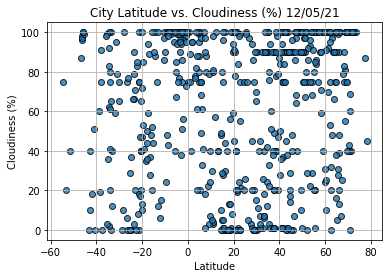

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

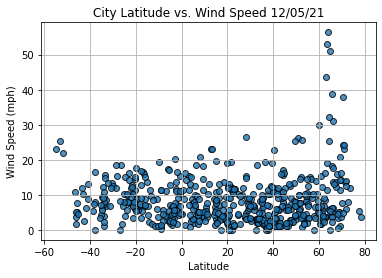

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()